In [1]:
def GetTeffStuff(ages, teffs_dict, lums_dict, chimins, star, lim = 1e1, return_chimins_ages = False):
    ups = np.array([])
    downs = np.array([])
    teffs = np.array([])
    markersizes = np.array([])
    chimins_out = np.array([])
    ages_out = np.array([])

    for i,age in enumerate(ages):
        try:
            up = 10**teffs_dict[str(age)+'-Teff-'+star][1] - 10**teffs_dict[str(age)+'-Teff-'+star][0]
            down = 10**teffs_dict[str(age)+'-Teff-'+star][2] - 10**teffs_dict[str(age)+'-Teff-'+star][1]
            if np.isclose(up,0, rtol = lim, atol = lim):
                up = down
            if np.isclose(down,0, rtol = lim, atol = lim):
                down = up

            ups = np.append(ups, up)
            downs = np.append(downs, down)
            teffs = np.append(teffs,10**teffs_dict[str(age)+'-Teff-'+star][1])
            markersizes = np.append(markersizes,((1/chimins[i])*20000))
            chimins_out = np.append(chimins_out, chimins[i])
            ages_out = np.append(ages_out, age)
        except:
            pass

    Teff = np.average(teffs,weights = markersizes)
    
    if return_chimins_ages:
        return ups, downs, teffs, markersizes, Teff, chimins_out, ages_out
    
    return ups, downs, teffs, markersizes, Teff
    
    
def GetLumStuff(ages, teffs_dict, lums_dict, chimins, star, lim = 1e1, return_chimins_ages = False):
    ups = np.array([])
    downs = np.array([])
    lums = np.array([])
    markersizes = np.array([])
    chimins_out = np.array([])
    ages_out = np.array([])

    for i,age in enumerate(ages):
        try:
            up = lums_dict[str(age)+'-Lum-'+star][1] - lums_dict[str(age)+'-Lum-'+star][0]
            down = lums_dict[str(age)+'-Lum-'+star][2] - lums_dict[str(age)+'-Lum-'+star][1]
            if np.isclose(up,0, rtol = lim, atol = lim):
                up = down
            if np.isclose(down,0, rtol = lim, atol = lim):
                down = up

            ups = np.append(ups, up)
            downs = np.append(downs, down)
            lums = np.append(lums,lums_dict[str(age)+'-Lum-'+star][1])
            markersizes = np.append(markersizes,((1/chimins[i])*20000))
            chimins_out = np.append(chimins_out, chimins[i])
            ages_out = np.append(ages_out, age)
        except:
            pass

    Lum = np.average(lums,weights = markersizes)
    
    if return_chimins_ages:
        return ups, downs, lums, markersizes, Lum, chimins_out, ages_out
    
    return ups, downs, lums, markersizes, Lum

<IPython.core.display.Javascript object>


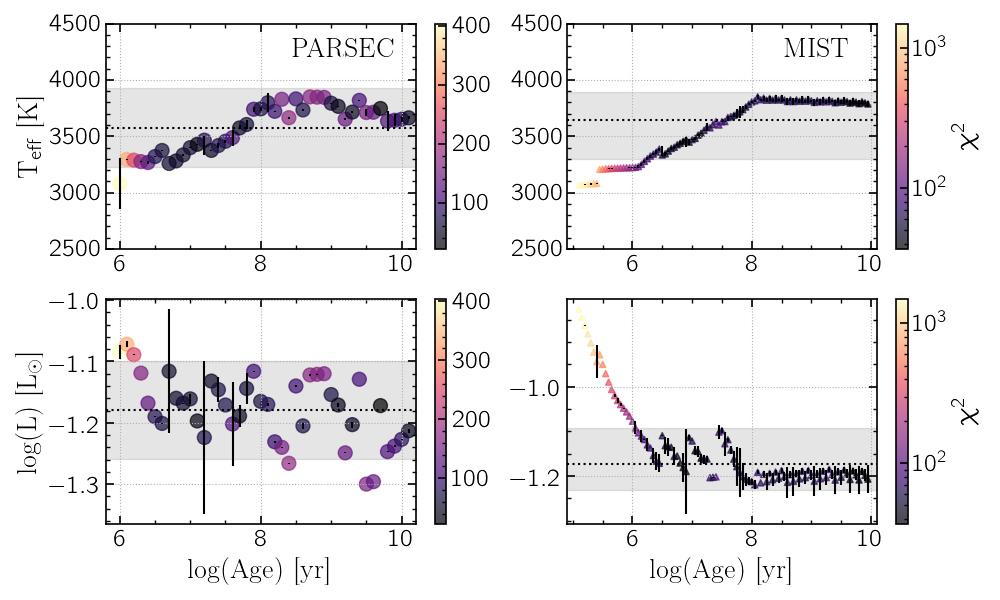

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/3573421730.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(s)
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/3573421730.py:54: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(s)
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/3573421730.py:96: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(s)
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/3573421730.py:129: MatplotlibDeprecationWarning: Auto-removal of grid

3577.396708502812
-1.1785540962193657
3644.2840938663935
-1.1719959990180646


In [38]:
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pickle

############# Parsec
plt.figure(figsize=(10,6))
plt.subplot(221)
parsec = pickle.load(open('parsec-model-fits.pkl','rb'))
ages = np.unique(parsec['logAge'])
chiminsParsec = pickle.load(open('Parsec-model-chimins-wconstrainedage.pkl','rb'))

teffs_dict,lums_dict = pickle.load(open('teff_lum_uncerts.pkl','rb'))

ups, downs, teffs, markersizes, Teff = GetTeffStuff(ages, teffs_dict, lums_dict, chiminsParsec, 'C', lim = 1e1)

plt.axhline(y=Teff, color='black', ls=':')
plt.fill_between(np.linspace(5.8,10.2,100), Teff + 350, y2 = Teff - 350, color='black', alpha = 0.1)

s = plt.scatter(ages, teffs, c=chiminsParsec, cmap='magma',
            s=100,
           alpha=0.7
               )
plt.errorbar(ages, teffs, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')
cbar = plt.colorbar(s)
#cbar.set_label('$\chi^2$')

plt.annotate('PARSEC',xy = (0.6,0.85), xycoords='axes fraction', fontsize=20)

plt.grid(ls=':')
#plt.xlabel('log(Age) [yr]')
plt.ylabel(r'T$_{\mathrm{eff}}$ [K]')
plt.ylim(2500,4500)
plt.xlim(5.8,10.2)

print(Teff)

#####################################
plt.subplot(223)
ups, downs, lums, markersizes, Lum = GetLumStuff(ages, teffs_dict, lums_dict, chiminsParsec, 'C', lim = 1e1)

plt.axhline(y=Lum, color='black', ls=':')
plt.fill_between(np.linspace(5.8,10.2,100), Lum + 0.08, y2 = Lum - 0.08, color='black', alpha = 0.1)

s = plt.scatter(ages, lums, c=chiminsParsec, cmap='magma',
            s=100,
           alpha=0.7
               )
plt.errorbar(ages, lums, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')
cbar = plt.colorbar(s)
#cbar.set_label('$\chi^2$')

#plt.annotate('Parsec',xy = (0.7,0.85), xycoords='axes fraction', fontsize=20)

plt.grid(ls=':')
plt.xlabel('log(Age) [yr]')
plt.ylabel(r'log(L) [L$_{\odot}$]')
#plt.ylim(2500,4500)
plt.xlim(5.8,10.2)

print(Lum)

############# MIST
plt.subplot(222)
chiminsMIST = pickle.load(open('MIST-model-chimins-wconstrainedage.pkl','rb'))
chiminsMIST = np.array(chiminsMIST)
agesMIST = pickle.load(open('MIST-model-ages-wconstrainedage.pkl','rb'))

teffs_dictMIST,lums_dictMIST = pickle.load(open('teff_lum_uncerts.pkl','rb'))

ups, downs, teffs, markersizes, Teff, chiminsMIST_for_plotting, ages_for_plotting = GetTeffStuff(
                                                agesMIST, teffs_dictMIST, 
                                                lums_dictMIST, 
                                                chiminsMIST, 'C', lim = 1e1, return_chimins_ages=True)

plt.axhline(y=Teff, color='black', ls=':')
plt.fill_between(np.linspace(4.9,10.1,100), Teff + 250, y2 = Teff - 350, color='black', alpha = 0.1)

s = plt.scatter(ages_for_plotting, teffs, c=chiminsMIST_for_plotting, cmap='magma',
            s=20,
           alpha=0.7,
            marker = '^',
            norm=colors.LogNorm(vmin=chiminsMIST_for_plotting.min(), vmax=chiminsMIST_for_plotting.max())
               )
plt.errorbar(ages_for_plotting, teffs, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')

plt.annotate('MIST',xy = (0.7,0.85), xycoords='axes fraction', fontsize=20)

cbar = plt.colorbar(s)
cbar.set_label('$\chi^2$')
plt.grid(ls=':')
#plt.xlabel('log(Age) [yr]')
#plt.ylabel(r'T$_{\mathrm{eff}}$')
plt.ylim(2500,4500)
plt.xlim(4.9,10.1)

print(Teff)

#################################
plt.subplot(224)
ups, downs, lums, markersizes, Lum, chiminsMIST_for_plotting, ages_for_plotting = GetLumStuff(
                                                agesMIST, teffs_dictMIST, 
                                                lums_dictMIST, 
                                                chiminsMIST, 'C', lim = 1e1, return_chimins_ages=True)

plt.axhline(y=Lum, color='black', ls=':')
plt.fill_between(np.linspace(4.9,10.1,100), Lum + 0.08, y2 = Lum - 0.06, color='black', alpha = 0.1)

s = plt.scatter(ages_for_plotting, lums, c=chiminsMIST_for_plotting, cmap='magma',
            s=20,
           alpha=0.7,
            marker = '^',
            norm=colors.LogNorm(vmin=chiminsMIST_for_plotting.min(), vmax=chiminsMIST_for_plotting.max())
               )
plt.errorbar(ages_for_plotting, lums, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')

#plt.annotate('MIST',xy = (0.7,0.85), xycoords='axes fraction', fontsize=20)

cbar = plt.colorbar(s)
cbar.set_label('$\chi^2$')
plt.grid(ls=':')
plt.xlabel('log(Age) [yr]')
#plt.ylabel(r'T$_{\mathrm{eff}}$')
#plt.ylim(2500,4500)
plt.xlim(4.9,10.1)

print(Lum)


plt.tight_layout()
#plt.savefig('teff-lum-vs-ages-C.png', dpi=300, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


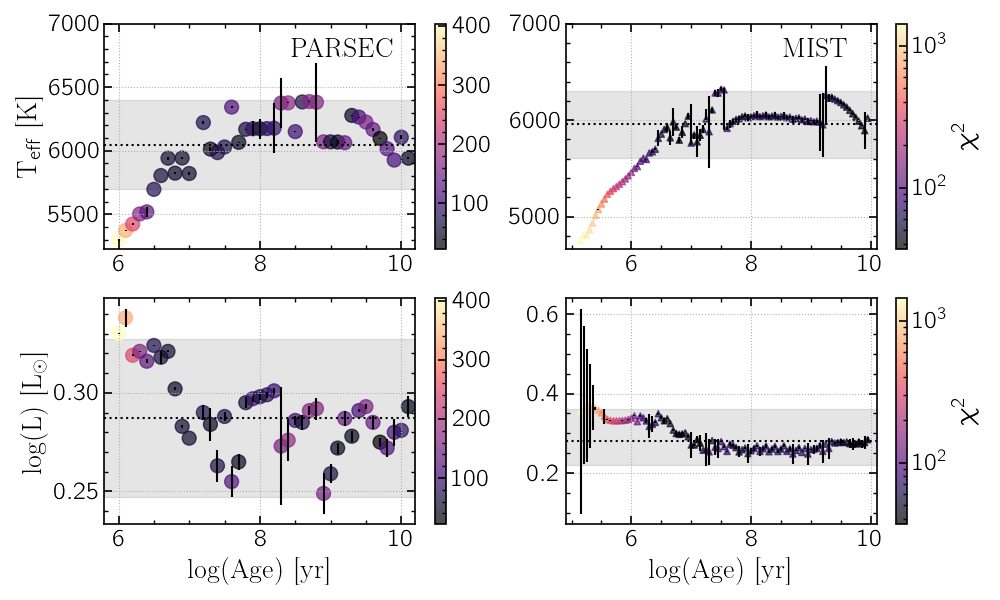

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/1630778147.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(s)
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/1630778147.py:59: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(s)
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/1630778147.py:101: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(s)
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_8699/1630778147.py:134: MatplotlibDeprecationWarning: Auto-removal of gri

6048.501763993888
0.28706898782559015
5956.809832615338
0.28112984625678744


In [40]:
%matplotlib inline
import matplotlib.colors as colors

############# Parsec
plt.figure(figsize=(10,6))
plt.subplot(221)
parsec = pickle.load(open('parsec-model-fits.pkl','rb'))
ages = np.unique(parsec['logAge'])
chiminsParsec = pickle.load(open('Parsec-model-chimins-wconstrainedage.pkl','rb'))

teffs_dict,lums_dict = pickle.load(open('teff_lum_uncerts.pkl','rb'))

ups, downs, teffs, markersizes, Teff, chiminsParsec_for_plotting, ages_for_plotting = GetTeffStuff(
                                                    ages, teffs_dict, lums_dict, chiminsParsec, 'A', 
                                                    lim = 1e1, return_chimins_ages=True)

plt.axhline(y=Teff, color='black', ls=':')
plt.fill_between(np.linspace(5.8,10.2,100), Teff + 350, y2 = Teff - 350, color='black', alpha = 0.1)

s = plt.scatter(ages_for_plotting, teffs, c=chiminsParsec_for_plotting, cmap='magma',
            s=100,
           alpha=0.7
               )
plt.errorbar(ages_for_plotting, teffs, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')
cbar = plt.colorbar(s)
#cbar.set_label('$\chi^2$')

plt.annotate('PARSEC',xy = (0.6,0.85), xycoords='axes fraction', fontsize=20)

plt.grid(ls=':')
#plt.xlabel('log(Age) [yr]')
plt.ylabel(r'T$_{\mathrm{eff}}$ [K]')
plt.ylim(top=7000)
plt.xlim(5.8,10.2)

print(Teff)

#####################################
plt.subplot(223)
ups, downs, lums, markersizes, Lum, chiminsParsec_for_plotting, ages_for_plotting = GetLumStuff(
                                                ages, teffs_dict, 
                                                lums_dict, 
                                                chiminsParsec, 'A', lim = 1e1, return_chimins_ages=True)

plt.axhline(y=Lum, color='black', ls=':')
plt.fill_between(np.linspace(5.8,10.2,100), Lum + 0.04, y2 = Lum - 0.04, color='black', alpha = 0.1)

s = plt.scatter(ages_for_plotting, lums, c=chiminsParsec_for_plotting, cmap='magma',
            s=100,
           alpha=0.7
               )
plt.errorbar(ages_for_plotting, lums, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')
cbar = plt.colorbar(s)
#cbar.set_label('$\chi^2$')

#plt.annotate('Parsec',xy = (0.7,0.85), xycoords='axes fraction', fontsize=20)

plt.grid(ls=':')
plt.xlabel('log(Age) [yr]')
plt.ylabel(r'log(L) [L$_{\odot}$]')
#plt.ylim(2500,4500)
plt.xlim(5.8,10.2)

print(Lum)

############# MIST
plt.subplot(222)
chiminsMIST = pickle.load(open('MIST-model-chimins-wconstrainedage.pkl','rb'))
chiminsMIST = np.array(chiminsMIST)
agesMIST = pickle.load(open('MIST-model-ages-wconstrainedage.pkl','rb'))

teffs_dictMIST,lums_dictMIST = pickle.load(open('teff_lum_uncerts.pkl','rb'))

ups, downs, teffs, markersizes, Teff, chiminsMIST_for_plotting, ages_for_plotting = GetTeffStuff(
                                                agesMIST, teffs_dictMIST, 
                                                lums_dictMIST, 
                                                chiminsMIST, 'A', lim = 1e1, return_chimins_ages=True)

plt.axhline(y=Teff, color='black', ls=':')
plt.fill_between(np.linspace(4.9,10.1,100), Teff + 350, y2 = Teff - 350, color='black', alpha = 0.1)

s = plt.scatter(ages_for_plotting, teffs, c=chiminsMIST_for_plotting, cmap='magma',
            s=20,
           alpha=0.7,
            marker = '^',
            norm=colors.LogNorm(vmin=chiminsMIST_for_plotting.min(), vmax=chiminsMIST_for_plotting.max())
               )
plt.errorbar(ages_for_plotting, teffs, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')

plt.annotate('MIST',xy = (0.7,0.85), xycoords='axes fraction', fontsize=20)

cbar = plt.colorbar(s)
cbar.set_label('$\chi^2$')
plt.grid(ls=':')
#plt.xlabel('log(Age) [yr]')
#plt.ylabel(r'T$_{\mathrm{eff}}$')
plt.ylim(top=7000)
plt.xlim(4.9,10.1)

print(Teff)

#################################
plt.subplot(224)
ups, downs, lums, markersizes, Lum, chiminsMIST_for_plotting, ages_for_plotting = GetLumStuff(
                                                agesMIST, teffs_dictMIST, 
                                                lums_dictMIST, 
                                                chiminsMIST, 'A', lim = 1e1, return_chimins_ages=True)

plt.axhline(y=Lum, color='black', ls=':')
plt.fill_between(np.linspace(4.9,10.1,100), Lum + 0.08, y2 = Lum - 0.06, color='black', alpha = 0.1)

s = plt.scatter(ages_for_plotting, lums, c=chiminsMIST_for_plotting, cmap='magma',
            s=20,
           alpha=0.7,
            marker = '^',
            norm=colors.LogNorm(vmin=chiminsMIST_for_plotting.min(), vmax=chiminsMIST_for_plotting.max())
               )
plt.errorbar(ages_for_plotting, lums, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')

#plt.annotate('MIST',xy = (0.7,0.85), xycoords='axes fraction', fontsize=20)

cbar = plt.colorbar(s)
cbar.set_label('$\chi^2$')
plt.grid(ls=':')
plt.xlabel('log(Age) [yr]')
#plt.ylabel(r'T$_{\mathrm{eff}}$')
#plt.ylim(2500,4500)
plt.xlim(4.9,10.1)

print(Lum)


plt.tight_layout()
plt.savefig('#teff-lum-vs-ages-A.png', dpi=300, bbox_inches='tight')
plt.show()